<a href="https://colab.research.google.com/github/ritzx21/Rotten-Tomatoes-Movies-Rating-Prediction/blob/main/Rotten_Tomatoes_Movie_Review_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf

In [ ]:
df_critic = pd.read_csv('rotten_tomatoes_critic_reviews.csv')

<ipython-input-2-44378c0de2b4>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_critic = pd.read_csv('rotten_tomatoes_critic_reviews.csv')


In [ ]:
df_critic.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [ ]:
df_critic.shape

(98491, 8)

In [ ]:
df = pd.read_csv('rotten_tomatoes_movies.csv')

In [ ]:
df.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [ ]:
df.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000
mean,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139
std,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000
50%,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


In [ ]:
print(f'Content Rating Category: {df.content_rating.unique()}')

Content Rating Category: ['PG' 'R' 'NR' 'G' 'PG-13' 'NC17']


In [ ]:
df.content_rating.value_counts()

R        6377
NR       5474
PG-13    2979
PG       2168
G         676
NC17       38
Name: content_rating, dtype: int64

[Text(0, 0, '6377'),
 Text(0, 0, '5474'),
 Text(0, 0, '2979'),
 Text(0, 0, '2168'),
 Text(0, 0, '676'),
 Text(0, 0, '38')]

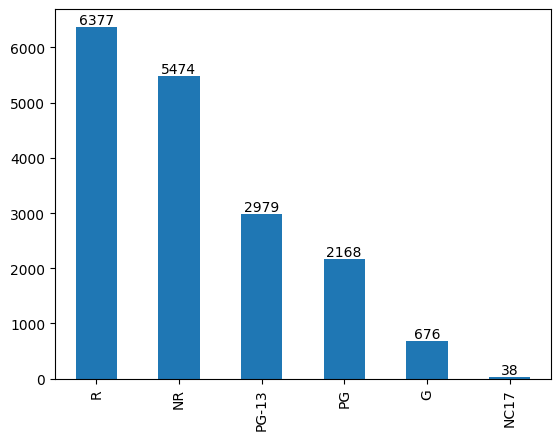

In [ ]:
ax = df.content_rating.value_counts().plot(kind = 'bar')
ax.bar_label(ax.containers[0])

In [ ]:
print(f'Generes Category: {df.genres.unique()}')

Generes Category: ['Action & Adventure, Comedy, Drama, Science Fiction & Fantasy' 'Comedy'
 'Comedy, Romance' ...
 'Animation, Art House & International, Drama, Science Fiction & Fantasy, Romance'
 'Art House & International, Romance'
 'Action & Adventure, Drama, Horror, Kids & Family, Mystery & Suspense']


In [ ]:
df.tomatometer_status.unique()

array(['Rotten', 'Certified-Fresh', 'Fresh', nan], dtype=object)

Machine learning models require all input and output variables to be numeric.

So if data contains categorical data,we need encode it to numbers before you can fit and evaluate a model.

The two most popular techniques are
- Ordinal Encoding and
- One-Hot Encoding.


In [ ]:
content_rating = pd.get_dummies(df.content_rating)
content_rating.head()

,G,NC17,NR,PG,PG-13,R
0,0,0,0,1,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,1,0,0,0
4,1,0,0,0,0,0


In [ ]:
df.audience_status.unique()

array(['Spilled', 'Upright', nan], dtype=object)

In [ ]:
df.audience_status.value_counts()

Upright    9390
Spilled    7874
Name: audience_status, dtype: int64

[Text(0, 0, '9390'), Text(0, 0, '7874')]

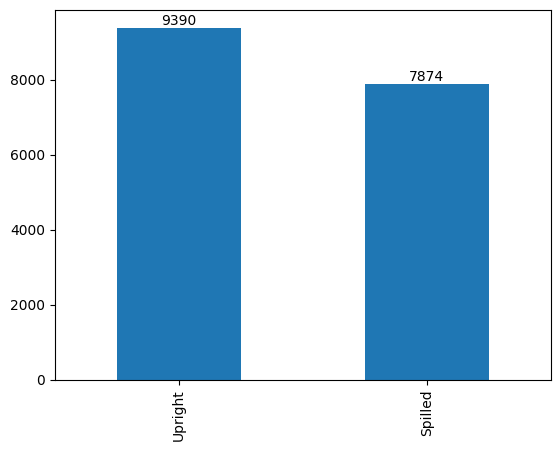

In [ ]:
ax1 = df.audience_status.value_counts().plot(kind = 'bar')
ax1.bar_label(ax1.containers[0])

since only 2 categories, ordinal encoding.

In [ ]:
audience_status = pd.DataFrame(df.audience_status.replace(['Upright','Spilled'],[0,1]))
audience_status.head()

,audience_status
0,1.0
1,0.0
2,1.0
3,0.0
4,0.0


In [ ]:
df.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [ ]:
df.tomatometer_status.unique()

array(['Rotten', 'Certified-Fresh', 'Fresh', nan], dtype=object)

In [ ]:
df.tomatometer_status.value_counts()

Rotten             7565
Fresh              6844
Certified-Fresh    3259
Name: tomatometer_status, dtype: int64

[Text(0, 0, '7565'), Text(0, 0, '6844'), Text(0, 0, '3259')]

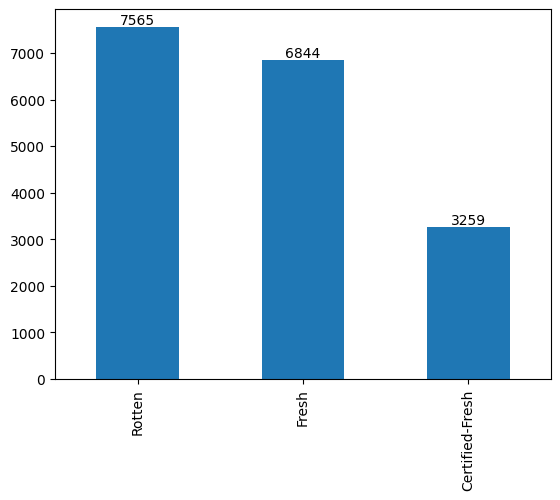

In [ ]:
ax2 = df.tomatometer_status.value_counts().plot(kind = 'bar')
ax2.bar_label(ax2.containers[0])

- Tomatometer_status has 3 categories (and are related), hence we can use ordinal encoding here too, and replace values with 0, 1 ,2.

In [ ]:
tomatometer_status = pd.DataFrame(df.tomatometer_status.replace(['Rotten','Fresh','Certified-Fresh'],[0,1,2]))
tomatometer_status

,tomatometer_status
0,0.0
1,2.0
2,1.0
3,2.0
4,1.0
...,...
17707,0.0
17708,2.0
17709,1.0
17710,1.0


In [ ]:
df.columns.unique()

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

In [ ]:
df_feature = pd.concat([df[['runtime','tomatometer_rating','tomatometer_count','audience_count','audience_rating','tomatometer_top_critics_count','tomatometer_fresh_critics_count','tomatometer_rotten_critics_count']],tomatometer_status, audience_status , content_rating], axis=1).dropna()
df_feature.head()

,runtime,tomatometer_rating,tomatometer_count,audience_count,audience_rating,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,tomatometer_status,audience_status,G,NC17,NR,PG,PG-13,R
0,119.0,49.0,149.0,254421.0,53.0,43,73,76,0.0,1.0,0,0,0,1,0,0
1,90.0,87.0,142.0,11574.0,64.0,44,123,19,2.0,0.0,0,0,0,0,0,1
2,122.0,67.0,24.0,14684.0,53.0,2,16,8,1.0,1.0,0,0,0,0,0,1
3,95.0,100.0,54.0,105386.0,97.0,6,54,0,2.0,0.0,0,0,1,0,0,0
4,127.0,89.0,27.0,68918.0,74.0,5,24,3,1.0,0.0,1,0,0,0,0,0


In [ ]:
df_feature.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_count,audience_rating,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,tomatometer_status,audience_status,G,NC17,NR,PG,PG-13,R
count,17017.000000,17017.000000,17017.000000,1.701700e+04,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000
mean,102.296233,60.519539,57.097197,1.471183e+05,60.324499,14.765999,36.237292,20.871188,0.752718,0.457072,0.039314,0.002174,0.294940,0.124993,0.171593,0.366986
std,18.653649,28.436397,66.814580,1.783955e+06,20.480600,15.172256,51.362454,29.978900,0.747250,0.498168,0.194346,0.046580,0.456029,0.330720,0.377037,0.481997
min,5.000000,0.000000,5.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,7.410000e+02,44.000000,3.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99.000000,66.000000,29.000000,4.423000e+03,62.000000,8.000000,17.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,111.000000,86.000000,76.000000,2.606700e+04,77.000000,23.000000,44.000000,24.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,266.000000,100.000000,535.000000,3.579764e+07,100.000000,69.000000,497.000000,303.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_feature.isnull().sum()

runtime                             0
tomatometer_rating                  0
tomatometer_count                   0
audience_count                      0
audience_rating                     0
tomatometer_top_critics_count       0
tomatometer_fresh_critics_count     0
tomatometer_rotten_critics_count    0
tomatometer_status                  0
audience_status                     0
G                                   0
NC17                                0
NR                                  0
PG                                  0
PG-13                               0
R                                   0
dtype: int64

In [ ]:
len(df)

17712

In [ ]:
len(df_feature)

17017

In [ ]:
df_feature.tomatometer_status.value_counts()

0.0    7375
1.0    6475
2.0    3167
Name: tomatometer_status, dtype: int64

Plot this to analyse


[Text(0, 0, '7375'), Text(0, 0, '6475'), Text(0, 0, '3167')]

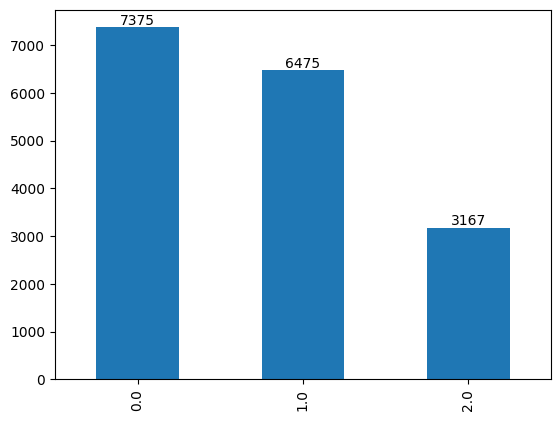

In [ ]:
ax = df_feature.tomatometer_status.value_counts().plot(kind= 'bar')
ax.bar_label(ax.containers[0])

7375 - rotten , 6475 - Fresh and 3167 - Certified-Fresh

In [ ]:
X = df_feature.drop('tomatometer_status', axis = 1)
Y = df_feature.tomatometer_status

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y ,test_size = 0.2 ,random_state = 42)

In [ ]:
print(f"Train data size - {X_train.shape}")
print(f"Test data size - {X_test.shape}")

Train data size - (13613, 15)
Test data size - (3404, 15)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(max_depth= 3, random_state = 2)

In [ ]:
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=2)

In [ ]:
Y_predict = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
print("Accuracy using Decision Tree Model is ",accuracy_score(Y_test, Y_predict)*100)

Accuracy using Decision Tree Model is  98.06110458284371


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# fig, ax = plt.subplots(figsize=(12, 9))
# plot_confusion_matrix(model, X_test, Y_test, cmap='cividis', ax=ax)

In [ ]:
confusion_matrix(Y_test , Y_predict)

array([[1488,    0,    0],
       [   0, 1267,   19],
       [   0,   47,  583]])